# Feature Engineering_3

## 4. Univariate Non-linear transformation

Model such as Linear model and Neural network is related deeply with scale and distribution of feature.

And, if there is non-linearity between feature and target, it is difficult to construct useful model with linear regression.

However, there is a trick. Using log, exp or sin, we can make distribution more similar with normal distribution.

Making feature's distribution as a shape of normal distribution takes advantage to us since most of algorithm we normally use is 

based on theory which is based on normal distribution.

##### Such as Integer Count Data

Transformation could work well in problem like integer count data.

In [1]:
import numpy as np
from matplotlib import pyplot as plt

rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000, 3))
w = rnd.normal(size=3)
X = rnd.poisson(10 * np.exp(X_org))
y = np.dot(X_org, w)
print(X[:10, 0])

[ 56  81  25  20  27  18  12  21 109   7]


If we see first 10 data, there is not any pattern.

**But, how about counting the value?**

In [2]:
print("Feature Appearance Number: \n{}".format(np.bincount(X[:, 0])))

Feature Appearance Number: 
[28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9
 17  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5
  2  1  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1
  0  2  0  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0
  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0
  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


Text(0.5,0,'Value')

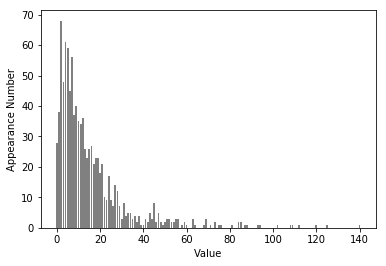

In [3]:
bins = np.bincount(X[:, 0])
plt.bar(range(len(bins)), bins,color='grey')
plt.ylabel("Appearance Number")
plt.xlabel("Value")

I use Poisson distribution that we can see commonly. Poisson has many number of small value and small number of large value.

But as i mentioned, most of **linear** machine learning algorithm doesn't work well on these distribution.

#### Apply Ridge Regression

In [4]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y , random_state=0)
score = Ridge().fit(X_train, y_train).score(X_test, y_test)
print("Test Score: {:.3f}".format(score))

Test Score: 0.622


It could be regarded as poor model.

But by using log scale, we can imporve model.

(If there is zero value then, we should use log(X+1).)

Text(0.5,0,'Value')

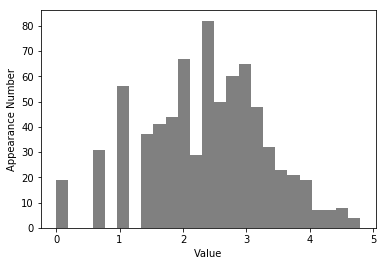

In [5]:
X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1)

plt.hist(X_train_log[:, 0], bins=25, color='gray')
plt.ylabel("Appearance Number")
plt.xlabel("Value")

Now, it is more like normal distribution.

#### Apply Ridge Regression again

In [6]:
score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
print("Test Score: {:.3f}".format(score))

Test Score: 0.875


#### Conclusion

Usually in practice problem, we transform part of all features or apply different transformation method to each feature.

Because features are all different each other.

**It is not needed to tree based model, but really needed to linear model. It is essential.**

At especially, these method like bining, polynomial or transformation works well in less complex model such as linear regression.

**But in complex model such as SVM or Neural Networ, it doesn't markedly work.**